# 様々な Clustering を行なう 10本 Knock

#### Algorithm 一覧

| 名称                  | 分類  | 推奨 Sample | 事前 Cluster数 | 特徴                                          |
|---------------------|-----|-----------|-------------|---------------------------------------------|
| KMeans              | 非階層 | 10K未満     | 要           | もっとも基本的な手法                                  |
| MiniBatch KMeans    | 非階層 | 10K以上     | 要           | KMeans を一定の Size ごとに実行。Sample数が多い場合はこちらを使う。 |
| Spectral Clustering | 非階層 | 10K未満     | 要           | Data 密度で Cluster を作成するため非線形でも機能する           |
| GMM                 | 非階層 | 10K 未満    | 要           | 傾いた楕円形で Cluster を作成できる                      |
| MeanShift           | 非階層 | 10K未満     | 任意          | Cluster 数の指定が不要                             |
| VBGMM               | 非階層 | 10K未満     | 任意          | Cluster 数の指定は不要                             |
| DBSCAN              | 非階層 | -         | 不要          | Data 密度で Cluster を作成する。外れ値を判定できる            |
| HDBSCAN             | 階層  | -         | 不要          | DBSCAN を階層型に拡張                              |

### Knock11: SpectralClustering で Clustering を実施してみよう
- SpectralClustering は Data 密度で Clustering するため、同心円状になっていない Data も、うまく Clustering が可能。

In [1]:
# Moon data の読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, preprocessing
from sklearn import datasets
from IPython.display import display

X, z = datasets.make_moons(n_samples=200, noise=0.05, random_state=0)
sc = preprocessing.StandardScaler()
X_norm = sc.fit_transform(X)
display(X_norm)

array([[ 0.36748451,  0.54576641],
       [ 1.28731953, -1.2803031 ],
       [-0.59397643,  0.04357482],
       [-1.74182239, -0.66371706],
       [ 1.45705144, -0.85667812],
       [ 1.58953574, -0.59675854],
       [ 0.54875768, -0.08552893],
       [ 0.44914675, -1.50218876],
       [ 0.46138047,  0.23124986],
       [ 0.71117525, -1.59382202],
       [-0.98693652,  1.16613579],
       [-0.28618307, -0.9941549 ],
       [ 1.51445888, -0.7760272 ],
       [ 0.82589866, -1.33505302],
       [-1.51451022,  0.79027655],
       [ 0.55545785, -0.08853775],
       [ 0.05104108,  1.284163  ],
       [-0.17030547, -1.12065006],
       [-0.1659644 ,  1.28843594],
       [-1.46106881,  1.15527198],
       [ 1.63987535, -0.48630812],
       [ 0.41814803, -1.47618916],
       [-0.34023715,  1.50810931],
       [ 0.90980627, -1.26183242],
       [-0.88905065,  1.56616629],
       [-0.29208555, -0.66541512],
       [ 1.55266276, -0.70888274],
       [ 1.59187607, -0.4198694 ],
       [-0.37934026,

<function matplotlib.pyplot.show(*args, **kw)>

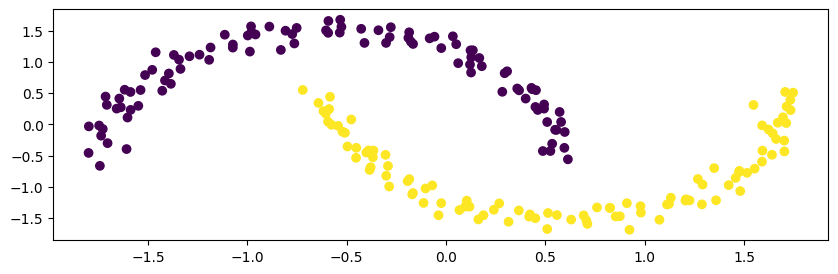

In [2]:
# Moon data の可視化
x = X_norm[:, 0]
y = X_norm[:, 1]
plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z)
plt.show

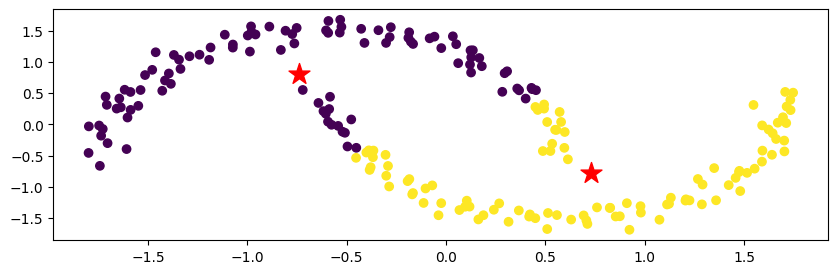

In [3]:
# k-means で clustering
km = cluster.KMeans(n_clusters=2)
z_km = km.fit(X_norm)

plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:, 0], z_km.cluster_centers_[:, 1], s=250, marker='*', c='red')
plt.show()

k-means では中心点からの距離で Cluster が決まるため、同心円状に広がっていない Moon data ではうまく分析できない。

/home/tera/.local/share/virtualenvs/ai_model_building_100-X6USFNE2/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


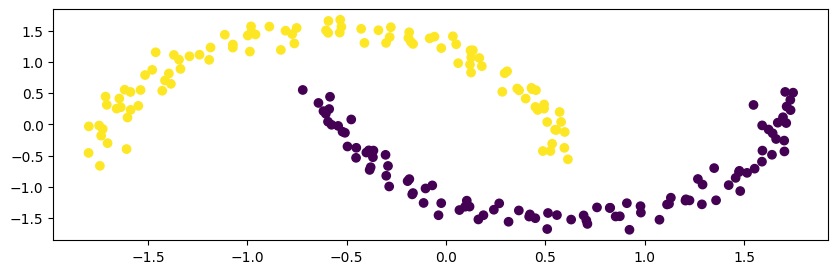

In [4]:
# SpectralCluster で clustering
spc = cluster.SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
    # affinity= : 親和性。Clustering を実施する際に作成する Graph 行列の作成方法を指定
    # Graph行列: Data がそれぞれどのように繋がっているかを示す行列。
    # nearest_neighbors: 最近傍
z_spc = spc.fit(X_norm)

plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z_spc.labels_)
plt.show()